# k-means Clustering
    

L'algoritmo `KMeans` si utilizza per il clustering dei dati per scoprire insights o pattern utili nei dati non etichettati.

In questa esercitazione il modello viene implementato e applicato su un dataset toy generato con `make_blobs` di sklearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Generazione del dataset



`make_blobs` prende questi parametri:
- `n_samples`: numero dei punti equamente distribuiti tra i clusters;
- `centres`: coordinate dei centri dei cluster da generare, oppure numero dei centroidi;
- `cluster_std`: deviazione standard dei singoli clusters.

In output restituisce due array:
- `X`: array di shape [n_samples, n_features], ovvero gli esempi generati;
- `y`: array di shape [n_samples], ovvero le labels degli esempi generati, specificano a quale cluster appartiene ogni esempio;

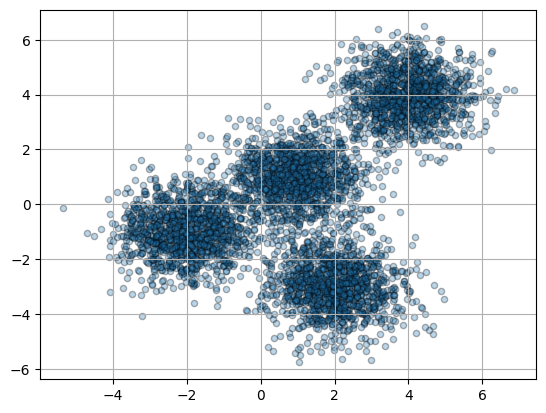

In [7]:
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

# Visualizzazione con scatter plot
plt.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.3, ec='k', s=80)
plt.grid()

## Definizione del modello


Consideriamo questi parametri di `KMeans`:

- `init`: metodo di inizializzazione dei centroidi.
  - in questo caso: __k-means++__, in grado di selezionare i centroidi in maniera tale da velocizzare la convergenza;
- `n_clusters`: numero dei cluster o numero dei centroidi.
  -  in questo caso: __4__;
- `n_init`: numero delle volte che l'algoritmo viene eseguito con un seed dei centroidi differente; l'output finale sarà quello con inertia migliore.
   - in questo caso: __12__;  



In [11]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)  # definizione
k_means.fit(X)  # addestramento

# Labels identificate nell'addestramento
k_means_labels = k_means.labels_
print(k_means_labels)

# Coordinate dei centroidi identificati nell'addestramento
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[2 1 1 ... 3 2 2]
[[ 0.96959198  0.98543802]
 [ 1.99876902 -3.01796355]
 [-2.03375169 -0.99827293]
 [ 3.97334234  3.98758687]]


### Visualizzazione dei risultati


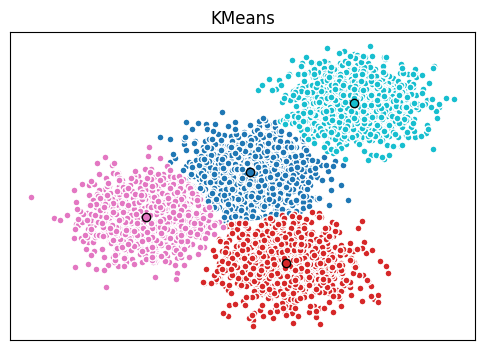

In [14]:
fig = plt.figure(figsize=(6, 4))

# Colori basati sulle labels trovate dal modello
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

# rimozione ticks assi
ax.set_xticks(())
ax.set_yticks(())

plt.show()


## Caso di `k = 3`

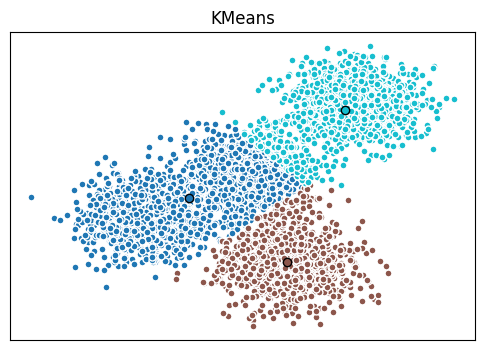

In [15]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_


fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())
ax.set_yticks(())

plt.show()


## Caso di `k = 3`

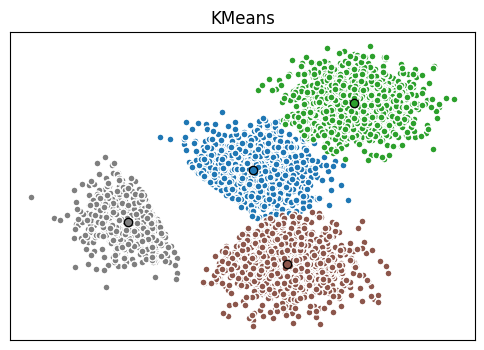

In [16]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())
ax.set_yticks(())

plt.show()


## Osservazioni

La somma dei quadrati intra-cluster (WCSS oppure `inertia`) è una misura di quanto sono compatti i cluster; per ogni punto $x$ si calcola la distanza dal centro $\mu_i$ del proprio cluster $C_i$, si fa il quadrato di questa distanza e si somma per tutti i punti e per tutti i cluster:

$WCSS = \sum_{i=1}^k \sum_{x \in C_i} || x - \mu_i ||^2$

- Per k=3, WCSS sarà maggiore rispetto a quello per k=4, poiché i punti appartenenti a cluster differenti vengono raggruppati insieme, causando un underfitting del modello.

- Per k=5, WCSS sarà minore rispetto a quello per k=4, poiché i punti vengono distribuiti in più cluster del necessario, portando a un overfitting del modello.